In [ ]:
# importación de librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# show plots inline
%matplotlib inline

In [ ]:
#importación desde kaggle
from google.colab import files
!pip install -q kaggle

In [ ]:
#subir kaggle.json con el cliente
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#Descarga del archivo
!kaggle datasets download -d hiimanshuagarwal/predictive-maintenance-dataset

Dataset URL: https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset
License(s): MIT
  0% 0.00/1.72M [00:00<?, ?B/s]
100% 1.72M/1.72M [00:00<00:00, 163MB/s]


In [ ]:
#descomprimir
!unzip predictive-maintenance-dataset.zip

Archive:  predictive-maintenance-dataset.zip
  inflating: predictive_maintenance_dataset.csv  


In [ ]:
#Lectura del archivo como pandas
data = pd.read_csv('/content/predictive_maintenance_dataset.csv')



In [ ]:
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
data.sample(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
33996,2/13/2015,W1F0VVMM,0,73383352,0,0,0,11,192031,0,0,0
55730,3/17/2015,W1F0W6QD,0,73065352,0,0,0,7,194190,0,0,4
88438,6/3/2015,S1F0LBY2,0,111752864,0,0,0,12,479960,0,0,0
114475,8/19/2015,W1F1CZLY,0,107026536,0,0,0,11,248189,0,0,0
94180,6/19/2015,W1F0JXDL,0,75209960,80,0,0,8,267358,0,0,0
31903,2/10/2015,W1F0ZK0H,0,187045360,0,0,0,8,218332,0,0,0
75610,4/28/2015,Z1F0LM6T,0,43035816,0,0,0,11,481765,0,0,0
16441,1/19/2015,Z1F0VNSW,0,86076968,0,0,0,5,208132,0,0,0
89407,6/5/2015,Z1F0LT0S,0,102278240,0,0,0,7,333073,0,0,0
912,1/1/2015,W1F1CMVW,0,106023872,0,0,0,13,42,0,0,0


In [ ]:
data.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB
None


In [ ]:
data['device'].unique()

array(['S1F01085', 'S1F0166B', 'S1F01E6Y', ..., 'S1F02XLX', 'S1F03499',
       'W1F1DA5ÿ'], dtype=object)

Para tratar date y device, creamos una columna con recuento de dias hasta fallo.

In [ ]:
#Numero de veces que failure vale 1
data['failure'].value_counts()

,count
failure,
0,124388
1,106


Únicamente disponemos de 106 eventos de fallo.

In [ ]:
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
import pandas as pd

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Ordena el DataFrame por dispositivo y fecha
df = df.sort_values(by=['device', 'date'])

# Crear una columna que identifique grupos de días consecutivos antes de cada fallo
df['group'] = df.groupby('device')['failure'].cumsum()

# Contar los días seguidos sin fallos (failure == 0) hasta que ocurra un fallo (failure == 1)
df['consecutive_days_without_failure'] = df.groupby(['device', 'group']).cumcount() + 1

# Ajustar para que los días en los que failure == 1 tengan un conteo de 0
df.loc[df['failure'] == 1, 'consecutive_days_without_failure'] = 0

# Añadir columna que indique si el siguiente registro es un fallo
df['next_failure'] = df['failure'].shift(-1)
df['device_next'] = df['device'].shift(-1)

# Filtrar registros que sean inmediatamente antes de un fallo para el mismo dispositivo
df_before_failure = df[(df['next_failure'] == 1) & (df['device'] == df['device_next'])]

# Eliminar columnas auxiliares
df.drop(columns=['group', 'next_failure', 'device_next'], inplace=True)


print("\nRegistros justo antes del fallo:")
print(df_before_failure['consecutive_days_without_failure'])


Registros justo antes del fallo:
15059      18
109040    214
103680    198
5856        6
33592      44
         ... 
80586     131
78975       8
15762      18
77452     123
97828     124
Name: consecutive_days_without_failure, Length: 106, dtype: int64


In [ ]:
#numero de años distintos en la variable datetime 'date'
df['date'].dt.year.unique()

array([2015], dtype=int32)

Solo hay un año de registros por lo que es dificil obtener valor del tiempo de funcionamiento, vamos a contabilizar días y meses a ver si puede aportar algo de valor

In [ ]:
data['date'] = pd.to_datetime(data['date'])

#Columna mes
data['month'] = data['date'].dt.month

#Columna dia
data['day'] = data['date'].dt.day

#Es fin de semana?
data['day_of_week'] = data['date'].dt.dayofweek
data['weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
#Contar número de devices distintos
data['device'].nunique()

1169

In [ ]:
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day,day_of_week,weekend
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,1,1,3,0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,3,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,3,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,3,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,3,0


In [ ]:
#Vamos a identificar los devices por sus primeros digitos para identificar el modelo
data["device_type"]=data["device"].apply(lambda x : x[:4])
data["device_type"].value_counts()

,count
device_type,
S1F0,33169
W1F0,23294
S1F1,21689
W1F1,19974
Z1F0,18869
Z1F1,7248
Z1F2,251


In [ ]:
#De esta manera queda un número más manejable para OHE
data.drop(['device'], axis=1, inplace=True)


In [ ]:
data.head()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day,day_of_week,weekend,device_type
0,2015-01-01,0,215630672,55,0,52,6,407438,0,0,7,1,1,3,0,S1F0
1,2015-01-01,0,61370680,0,3,0,6,403174,0,0,0,1,1,3,0,S1F0
2,2015-01-01,0,173295968,0,0,0,12,237394,0,0,0,1,1,3,0,S1F0
3,2015-01-01,0,79694024,0,0,0,6,410186,0,0,0,1,1,3,0,S1F0
4,2015-01-01,0,135970480,0,0,0,15,313173,0,0,3,1,1,3,0,S1F0


Distribución de métricas sin fallo


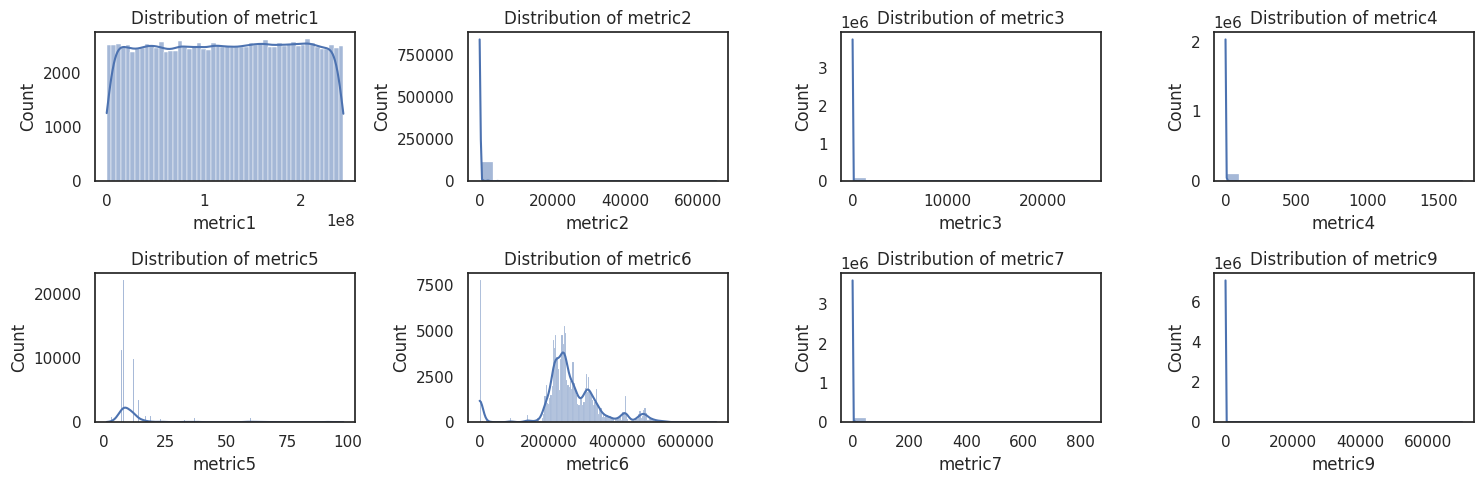

In [ ]:
# Distribución de métricas
plt.figure(figsize=(15, 5))
print("Distribución de métricas sin fallo")
mask= df.failure==0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Distribución de métricas con fallo


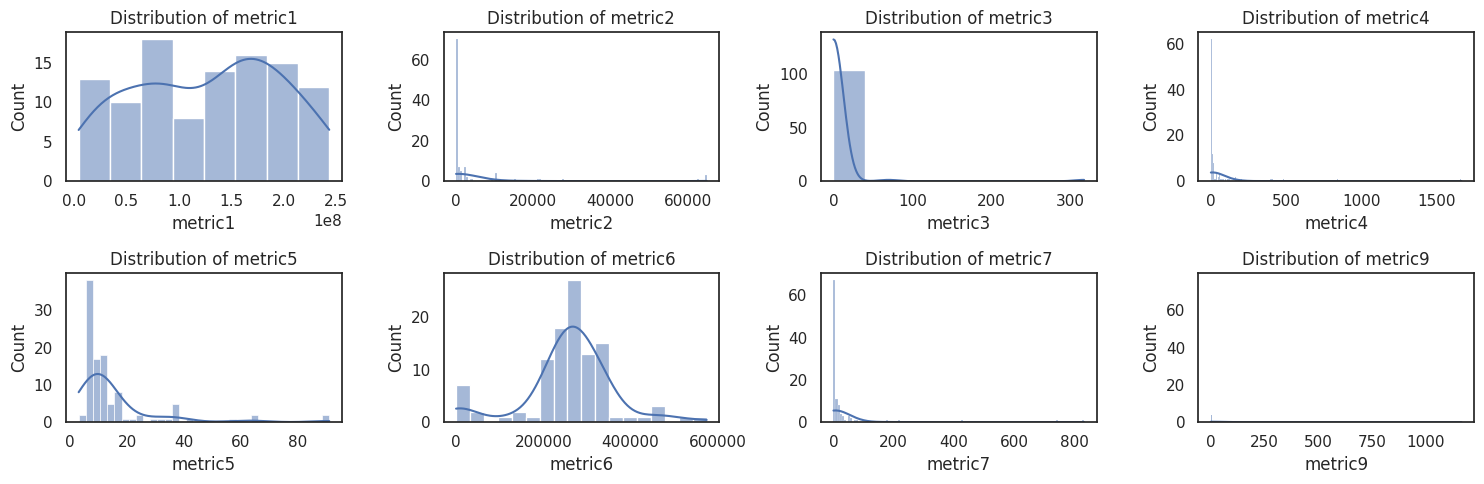

In [ ]:
# Distribución de métricas
plt.figure(figsize=(15, 5))
print("Distribución de métricas con fallo")
mask= df.failure==1
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

In [ ]:
data.head()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day,day_of_week,weekend,device_type
0,2015-01-01,0,215630672,55,0,52,6,407438,0,0,7,1,1,3,0,S1F0
1,2015-01-01,0,61370680,0,3,0,6,403174,0,0,0,1,1,3,0,S1F0
2,2015-01-01,0,173295968,0,0,0,12,237394,0,0,0,1,1,3,0,S1F0
3,2015-01-01,0,79694024,0,0,0,6,410186,0,0,0,1,1,3,0,S1F0
4,2015-01-01,0,135970480,0,0,0,15,313173,0,0,3,1,1,3,0,S1F0


In [ ]:
data.drop(['day_of_week', 'date'], axis=1, inplace=True)

In [ ]:
#One Hot Encode
data = pd.get_dummies(data, drop_first=True)

Text(0.5, 1.0, 'Correlation Matrix')

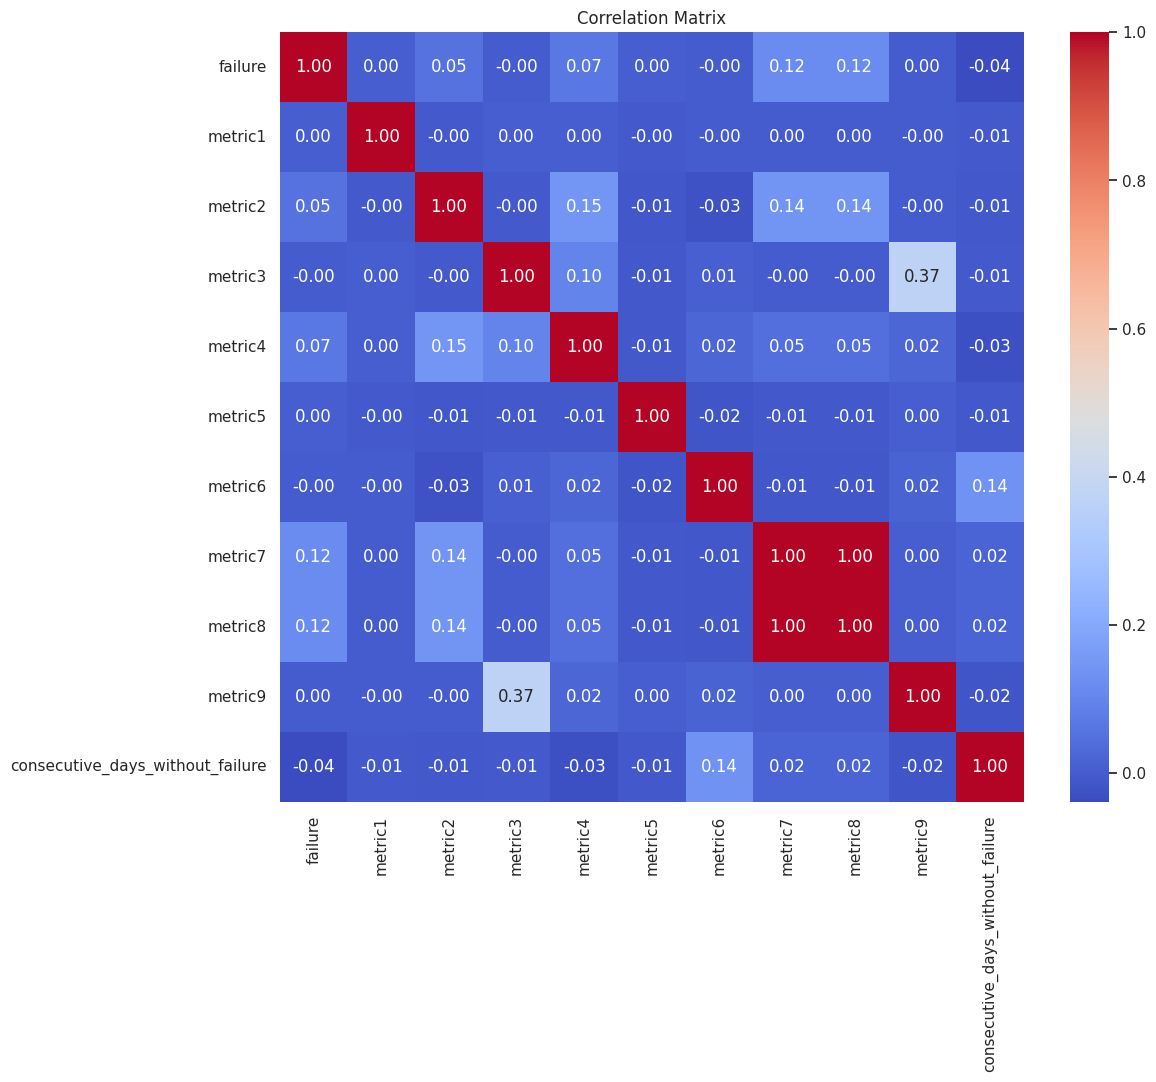

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_colums = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_colums.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")


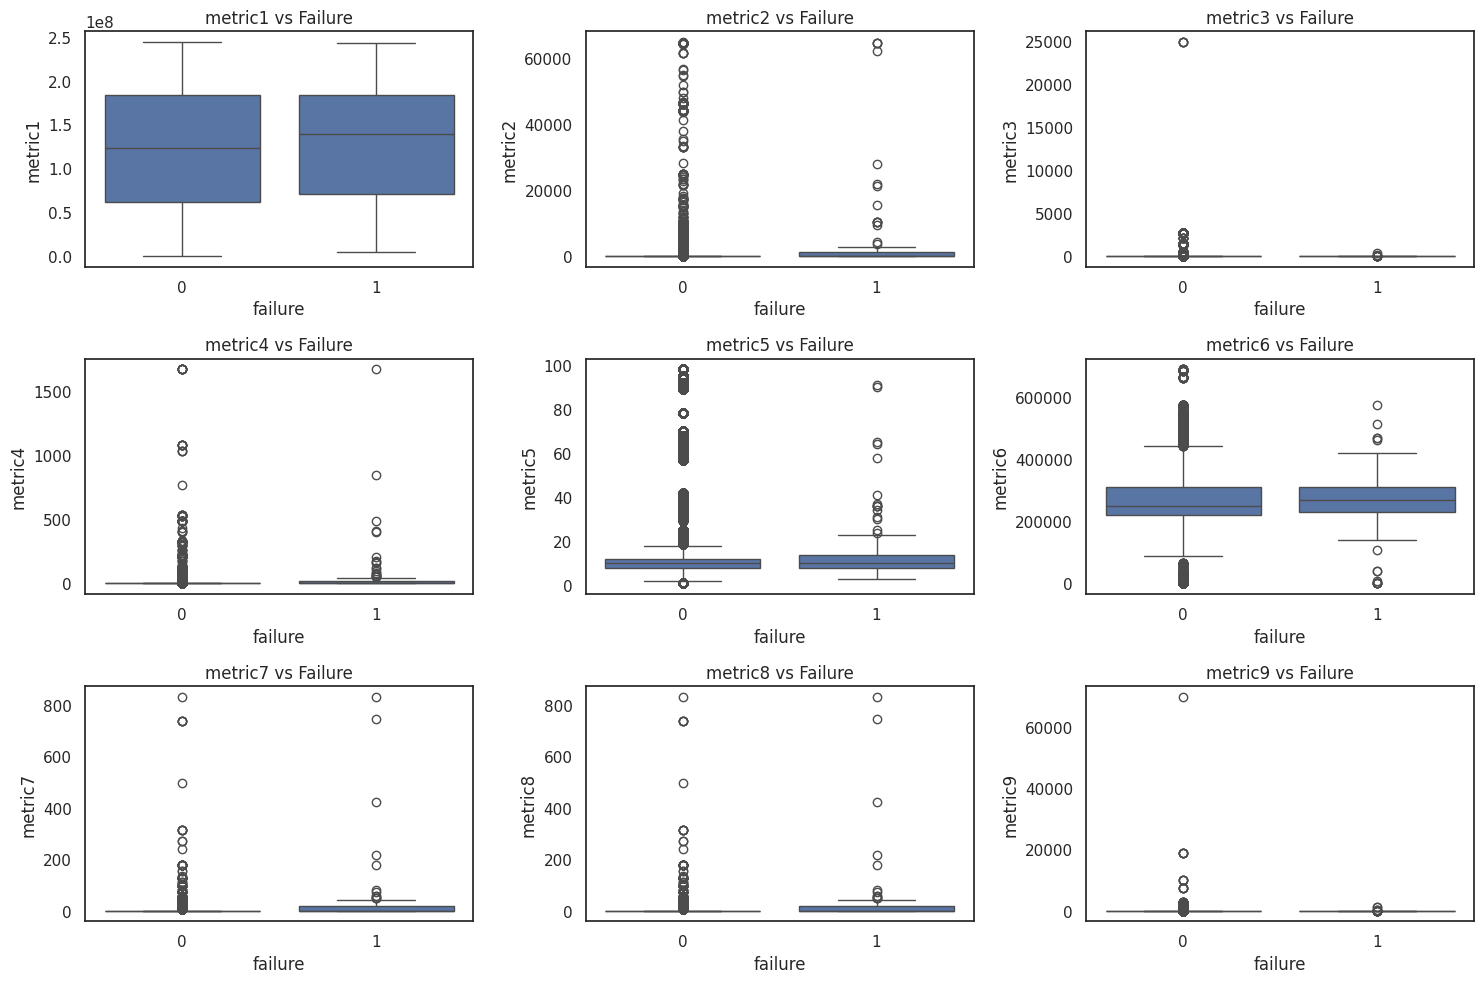

In [ ]:
# Visualizar la distribución de cada métrica en función de 'failure'
metrics = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='failure', y=metric, data=data)
    plt.title(f'{metric} vs Failure')
plt.tight_layout()
plt.show()


No se aprecian características fácilmente identificables, si se puede observar que suben los cuantiles, lo que sufiere que tienden a producirse con un aumento de las métricas, salvo en la 3 y la 9 donde se produce en valores mínimos.

In [ ]:
data.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day,weekend,device_type_S1F1,device_type_W1F0,device_type_W1F1,device_type_Z1F0,device_type_Z1F1,device_type_Z1F2
0,0,215630672,55,0,52,6,407438,0,0,7,1,1,0,False,False,False,False,False,False
1,0,61370680,0,3,0,6,403174,0,0,0,1,1,0,False,False,False,False,False,False
2,0,173295968,0,0,0,12,237394,0,0,0,1,1,0,False,False,False,False,False,False
3,0,79694024,0,0,0,6,410186,0,0,0,1,1,0,False,False,False,False,False,False
4,0,135970480,0,0,0,15,313173,0,0,3,1,1,0,False,False,False,False,False,False


Vamos a tratar el desbalanceo con un undersampling selectivo, para ello NearMiss busca vecinos cercanos para coger una muestra de funcionamiento sin fallo con relevancia.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

X= data.drop(['failure'], axis=1)
y= data['failure']

# Dividir el dataset en train y test, manteniendo la proporción de 'failure'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =y,  random_state=42)


# Aplicar NearMiss para balancear las clases en el conjunto de entrenamiento
nearmiss = NearMiss(version=1)
X_resampled, y_resampled = nearmiss.fit_resample(X_train, y_train)

# Verificar las dimensiones después de aplicar NearMiss
print(f"Dimensiones después de NearMiss: X_resampled = {X_resampled.shape}, y_resampled = {y_resampled.shape}")


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)

X_test = scaler.transform(X_test)

y_train = y_resampled

Dimensiones después de NearMiss: X_resampled = (170, 18), y_resampled = (170,)


In [ ]:
# Lista de modelos a entrenar
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
models = [
    XGBClassifier(),
    BaggingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

# Nombres de los modelos
names = [
    "XGBClassifier",
    "BaggingClassifier",
    "LogisticRegression",
    "SVC",
    "KNeighborsClassifier",
    "GaussianNB",
    "RandomForestClassifier",
    "AdaBoostClassifier"
]


In [ ]:
# Diccionario para almacenar los resultados
results = []

# Automatizar el entrenamiento y evaluación
for name, model in zip(names, models):
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Almacenar los resultados en una lista
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convertir los resultados a un DataFrame para mejor visualización
results_df = pd.DataFrame(results)
print("\nResultados:")
print(results_df.sort_values(by='Accuracy', ascending=False))

Entrenando XGBClassifier...
Entrenando BaggingClassifier...
Entrenando LogisticRegression...
Entrenando SVC...
Entrenando KNeighborsClassifier...
Entrenando GaussianNB...
Entrenando RandomForestClassifier...
Entrenando AdaBoostClassifier...

Resultados:
                    Model  Accuracy  Precision    Recall  F1 Score
2      LogisticRegression  0.639022   0.998655  0.639022  0.778964
4    KNeighborsClassifier  0.572433   0.998597  0.572433  0.727293
3                     SVC  0.496084   0.998672  0.496084  0.662348
6  RandomForestClassifier  0.038315   0.998089  0.038315  0.072307
0           XGBClassifier  0.006828   0.999157  0.006828  0.011899
5              GaussianNB  0.006587   0.999157  0.006587  0.011422
1       BaggingClassifier  0.005904   0.991351  0.005904  0.010150
7      AdaBoostClassifier  0.005904   0.991351  0.005904  0.010150


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import ClusterCentroids

# Definir X e y (asegurate de tener los datos cargados en `data`)
X = data.drop('failure', axis=1)
y = data['failure']

# Dividir el dataset en train y test, manteniendo la proporción de 'failure'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=42)




In [ ]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler, ClusterCentroids, EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Diccionario de modelos
models = {
    "XGB": XGBClassifier(),
    "Bagging": BaggingClassifier(),
    "LogisticR": LogisticRegression(),
    "SVC": SVC(),
    "KNC": KNeighborsClassifier(),
    "GNB": GaussianNB(),
    "RF": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Diccionario de undersamplers
undersamplers = {
    "NM": NearMiss(),
    "RUS": RandomUnderSampler(),
    "CC": ClusterCentroids(),
    "TL": TomekLinks(),
    "ENN": EditedNearestNeighbours()
}
# Función para evaluar modelos con diferentes técnicas de undersampling
def evaluar_con_undersampling(undersamplers, models, X_train, X_test, y_train, y_test):
    resultados = []

    # Iterar sobre las técnicas de undersampling
    for undersampler_name, undersampler in undersamplers.items():
        print(f"\nAplicando {undersampler_name}...")


        # Escalar los datos
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Realizar el undersampling
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)


        # Iterar sobre los modelos
        for model_name, model in models.items():
            print(f"Entrenando {model_name}...")
            model.fit(X_train_resampled, y_train_resampled)  # Entrenamiento
            y_pred = model.predict(X_test_scaled)  # Predicciones

            # Métricas de evaluación
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0 )
            f1 = f1_score(y_test, y_pred,average='weighted', zero_division=0)

            # Guardar los resultados
            resultados.append({
                'Undersampling': undersampler_name,
                'Modelo': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            })

    return pd.DataFrame(resultados)

# Evaluar los modelos con las diferentes técnicas de undersampling
resultados_undersampling = evaluar_con_undersampling(undersamplers, models, X_train, X_test, y_train, y_test)

# Mostrar los resultados
print(resultados_undersampling)





Aplicando NM...
Entrenando XGB...
Entrenando Bagging...
Entrenando LogisticR...
Entrenando SVC...
Entrenando KNC...
Entrenando GNB...
Entrenando RF...
Entrenando AdaBoost...

Aplicando RUS...
Entrenando XGB...
Entrenando Bagging...
Entrenando LogisticR...
Entrenando SVC...
Entrenando KNC...
Entrenando GNB...
Entrenando RF...
Entrenando AdaBoost...

Aplicando CC...
Entrenando XGB...
Entrenando Bagging...
Entrenando LogisticR...
Entrenando SVC...
Entrenando KNC...
Entrenando GNB...
Entrenando RF...
Entrenando AdaBoost...

Aplicando TL...
Entrenando XGB...
Entrenando Bagging...
Entrenando LogisticR...
Entrenando SVC...
Entrenando KNC...
Entrenando GNB...
Entrenando RF...
Entrenando AdaBoost...

Aplicando ENN...
Entrenando XGB...
Entrenando Bagging...
Entrenando LogisticR...
Entrenando SVC...
Entrenando KNC...
Entrenando GNB...
Entrenando RF...
Entrenando AdaBoost...
   Undersampling     Modelo  Accuracy  Precision    Recall  F1 Score
0             NM        XGB  0.086871   0.998691  0.08

In [ ]:
from sklearn.model_selection import GridSearchCV

# Seleccionar el mejor modelo según la métrica 'F1 Score'
mejor_modelo = resultados_undersampling.loc[resultados_undersampling['F1 Score'].idxmax()]
mejor_resultado = resultados_undersampling.loc[resultados_undersampling['F1 Score'].idxmax()]
# Imprimir el mejor modelo seleccionado
print(f"El mejor modelo es: {mejor_modelo['Modelo']} con undersampling: {mejor_modelo['Undersampling']}")
print(f"El mejor resultado es F1: {mejor_resultado['F1 Score']}")


El mejor modelo es: AdaBoost con undersampling: TL
El mejor resultado es F1: 0.9988434432477405


In [ ]:
# Ajuste de hiperparámetros
xgb_model = XGBClassifier()

# Inicializar el undersampler TomekLinks
tomek_links = TomekLinks()

# Aplicar el undersampling con TomekLinks en el conjunto de entrenamiento
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_train, y_train)

# Estandarizar los datos después del undersampling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir el espacio de búsqueda de hiperparámetros para XGBClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Inicializar el GridSearchCV con XGBClassifier y el espacio de parámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1)

# Realizar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train_resampled)

# Mejor combinación de parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Evaluar el rendimiento con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test_scaled)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_best, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_best, average='weighted', zero_division=0)

# Imprimir los resultados del mejor modelo
print(f"\nRendimiento del mejor modelo con GridSearchCV:")
print(f"Modelo seleccionado: XGBClassifier")
print(f"Técnica de undersampling utilizada: TomekLinks")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

Rendimiento del mejor modelo con GridSearchCV:
Modelo seleccionado: XGBClassifier
Técnica de undersampling utilizada: TomekLinks
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 0.9992
Precision: 0.9983
Recall: 0.9992
F1 Score: 0.9987


In [ ]:
X_test_scaled = scaler.transform(X_test)

# Obtener la probabilidad de fallo con el modelo entrenado
failure_probabilities = best_model.predict_proba(X_test)[:, 1]  # Solo probabilidad de 'failure = 1'

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame(X_test, columns=X.columns)  # Convertir X_test a DataFrame con nombres de columnas
resultados['Probabilidad_Fallo'] = failure_probabilities

# Extraer la columna del modelo de máquina basada en el valor True (o 1)
device_columns = [col for col in X.columns if col.startswith('device_type')]
resultados['Modelo_Maquina'] = resultados[device_columns].apply(lambda row: row.idxmax() if row.max() == 1 else None, axis=1)

# Definir el estado de salud basado en la probabilidad de fallo
def calcular_estado_salud(prob):
    if prob < 0.15:
        return "Bueno"
    elif 0.15 <= prob < 0.4:
        return "Moderado"
    else:
        return "Malo"

resultados['Estado_Salud'] = resultados['Probabilidad_Fallo'].apply(calcular_estado_salud)

# Seleccionar columnas relevantes para el análisis
resultados_finales = resultados[['Modelo_Maquina', 'Probabilidad_Fallo', 'Estado_Salud']]

# Mostrar los resultados agrupados por modelo de máquina
print("\nResultados por Máquina:")
print(resultados_finales)

# Opcional: Calcular estadísticas por cada modelo de máquina
estadisticas = resultados_finales.groupby('Modelo_Maquina').agg(
    Total=('Probabilidad_Fallo', 'size'),
    Probabilidad_Promedio=('Probabilidad_Fallo', 'mean'),
    #Acumulación de alertas de fallo registradas
    Bajo_Riesgo=('Estado_Salud', lambda x: (x == 'Bueno').sum()),
    Moderado_Riesgo=('Estado_Salud', lambda x: (x == 'Moderado').sum()),
    Alto_Riesgo=('Estado_Salud', lambda x: (x == 'Malo').sum())
).reset_index()

print("\nEstadísticas por Modelo de Máquina:")
print(estadisticas)





Resultados por Máquina:
          Modelo_Maquina  Probabilidad_Fallo Estado_Salud
10339   device_type_W1F0            0.006254        Bueno
31973   device_type_W1F1            0.005146        Bueno
57175   device_type_W1F1            0.005146        Bueno
31047   device_type_W1F0            0.017201        Bueno
65110   device_type_W1F0            0.005146        Bueno
...                  ...                 ...          ...
53679   device_type_W1F0            0.005146        Bueno
37178               None            0.005146        Bueno
123308  device_type_W1F1            0.005146        Bueno
99938               None            0.192451     Moderado
103446  device_type_S1F1            0.005146        Bueno

[24899 rows x 3 columns]

Estadísticas por Modelo de Máquina:
     Modelo_Maquina  Total  Probabilidad_Promedio  Bajo_Riesgo  \
0  device_type_S1F1   4356               0.008947         4345   
1  device_type_W1F0   4612               0.017872         4482   
2  device_type_W1F